In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#copy path to training data and validation data 
Path_train="/content/gdrive/My Drive/newdataset/newdataset/train"
Path_valid="/content/gdrive/My Drive/newdataset/newdataset/test"
image_generator = ImageDataGenerator(rescale=1./255)

#Images are reshaped to [224,224] as this is the requirement for VGG16 network
dataset = image_generator.flow_from_directory(Path_train, #contains images to training set 
                                              target_size=(224, 224),
                                              class_mode='categorical')
validation_set=image_generator.flow_from_directory(Path_valid, # contains images of validation set
                                              target_size=(224, 224),
                                              class_mode='categorical')

Using TensorFlow backend.


Found 3277 images belonging to 2 classes.
Found 821 images belonging to 3 classes.


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
history_1= model.fit_generator(
	dataset,
	steps_per_epoch=20,
	validation_data=validation_set,
	validation_steps=5,
	epochs=10)
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

58892288/58889256 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.9539 - accuracy: 0.4422 

InvalidArgumentError: ignored

[INFO] compiling model...
[INFO] training head...
Epoch 1/10
20/20 [==============================] - 54s 3s/step - loss: 0.7859 - accuracy: 0.6016 - val_loss: 1.1159 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 40s 2s/step - loss: 0.5319 - accuracy: 0.7641 - val_loss: 0.7139 - val_accuracy: 0.5625
Epoch 3/10
20/20 [==============================] - 38s 2s/step - loss: 0.4228 - accuracy: 0.8125 - val_loss: 0.7050 - val_accuracy: 0.5625
Epoch 4/10
20/20 [==============================] - 36s 2s/step - loss: 0.3425 - accuracy: 0.8562 - val_loss: 0.6340 - val_accuracy: 0.7500
Epoch 5/10
20/20 [==============================] - 31s 2s/step - loss: 0.3343 - accuracy: 0.8687 - val_loss: 0.6319 - val_accuracy: 0.7500
Epoch 6/10
20/20 [==============================] - 24s 1s/step - loss: 0.2979 - accuracy: 0.8781 - val_loss: 0.6107 - val_accuracy: 0.8125
Epoch 7/10
20/20 [==============================] - 25s 1s/step - loss: 0.2897 - accuracy: 0.8813 - val_loss: 

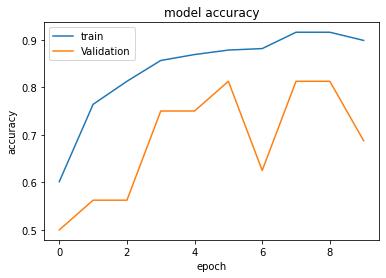

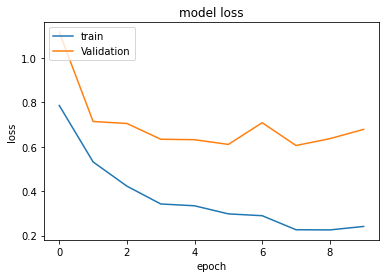

In [ ]:
baseModel = DenseNet201(input_shape=[224, 224, 3], include_top=False, weights='imagenet')

# construct the head of the model that will be placed on top of the  the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
history= model.fit_generator(
	dataset,
	steps_per_epoch=20,
	validation_data=validation_set,
	validation_steps=5,
	epochs=10)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
